In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

In [31]:
import seaborn as sns
print(sns.__version__)  # Should print the version (e.g., 0.12.2)

ModuleNotFoundError: No module named 'seaborn'

In [3]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
# drop day, month and year
df.drop(['day','month','year'], axis=1, inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               5
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
# Encoding

df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [11]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,-1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,-1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,-1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,-1
243,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,-1


In [12]:
df['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [13]:
# independent and dependent features
X=df.drop('FWI', axis=1) # independent
y=df['FWI'] # dependent

In [14]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [15]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [16]:
X_train.shape, X_test.shape

((183, 11), (61, 11))

In [17]:
# finding the features which are highly corelated and we will drop them

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [18]:
corr_features=correlation(X_train, 0.85)

In [ ]:
corr_features

{'BUI', 'DC'}

In [19]:
# droping the features {'BUI', 'DC'} because they are corelated more the 85%

X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((183, 9), (61, 9))

# Feature Scaling or Standardization

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [21]:
X_train_scaled

array([[-0.81085018,  0.16311382,  1.29231566, ..., -0.773495  ,
        -1.1098231 ,  0.96291111],
       [ 1.06405791, -0.44884168,  0.15167049, ...,  0.83939993,
         0.9010445 , -0.99500815],
       [-0.27516216,  0.63907922, -0.60875963, ..., -0.21981465,
         0.9010445 , -0.99500815],
       ...,
       [-1.88222624,  0.91105944,  0.53188555, ..., -1.08644476,
        -1.1098231 ,  0.96291111],
       [ 0.26052587, -0.38084663,  0.15167049, ...,  0.47830405,
         0.9010445 , -0.99500815],
       [-0.54300617,  0.9790545 ,  2.05274578, ..., -0.86978723,
        -1.1098231 ,  0.96291111]])

# Box plot to Understand the Effect of Standard Scaler

In [29]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')


plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')



ModuleNotFoundError: No module named 'matplotlib'

# Linear Regression Model

Mean absolute error 0.6327534198381529
R2 score 0.9881475297791606


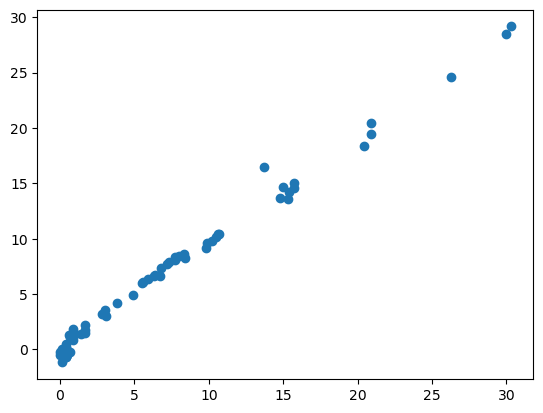

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg=LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred=linreg.predict(X_test_scaled)

mae=mean_absolute_error(y_test, y_pred)
score= r2_score(y_test, y_pred)

print('Mean absolute error', mae)
print('R2 score', score)
plt.scatter(y_test, y_pred)

# Lasso Regression

Example
Suppose you’re predicting house prices with 10 features:

Regular Linear Regression: Uses all 10 features, even if some are irrelevant (e.g., "number of garden gnomes").

Lasso Regression: Might set the coefficient for "garden gnomes" to ZERO, ignoring it. Only uses important features like size, location, etc.



Mean absolute error 1.2351016060178346
R2 score 0.9488879834990414


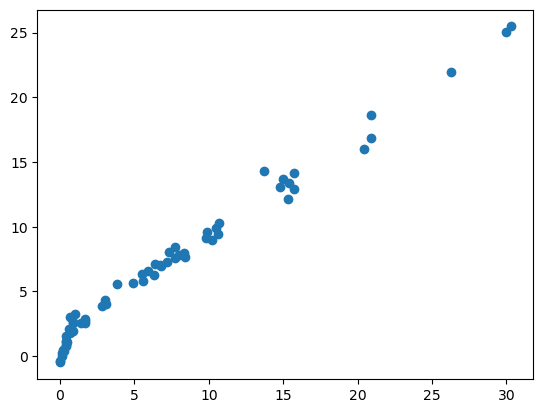

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso=Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred=lasso.predict(X_test_scaled)

mae=mean_absolute_error(y_test, y_pred)
score= r2_score(y_test, y_pred)

print('Mean absolute error', mae)
print('R2 score', score)
plt.scatter(y_test, y_pred)

# Cross Validation Lasso

What is Cross-Validation (CV)?
Cross-validation is a way to test a model’s performance without using the test data.
How it works:

Split the training data into "folds" (e.g., 5 groups).

Train the model on 4 folds, validate on the 5th.

Repeat for all folds and average the results.

Mean absolute error 0.6703739677731304
R2 score 0.9871427757917813


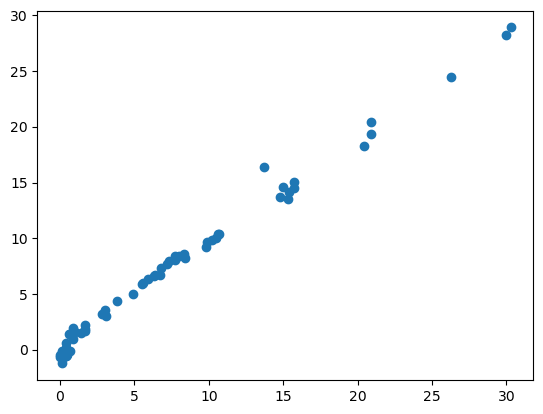

In [ ]:
from sklearn.linear_model import LassoCV


lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)

mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)

print('Mean absolute error', mae)
print('R2 score', score)


# Ridge Regression Model


Mean absolute error 0.6556156122322476
R2 score 0.9874438857837581


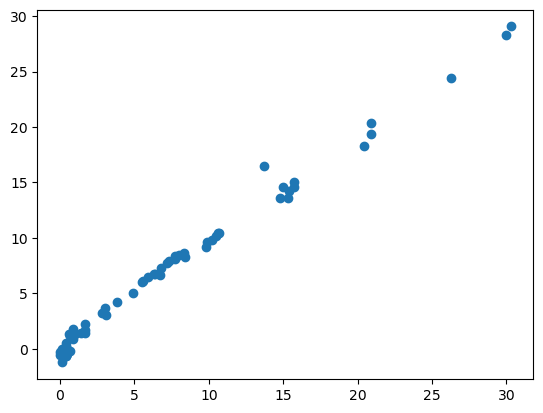

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)

mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)

print('Mean absolute error', mae)
print('R2 score', score)
plt.scatter(y_test,y_pred)


# Ridge Regression Model CV


Mean absolute error 0.6703739677731304
R2 score 0.9871427757917813


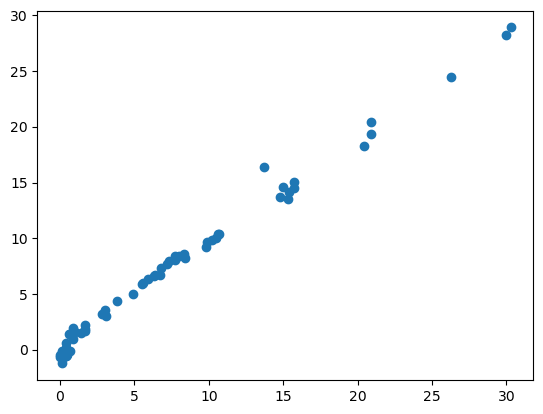

In [ ]:
from sklearn.linear_model import RidgeCV


ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)

y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)

mae=mean_absolute_error(y_test, y_pred)
score=r2_score(y_test, y_pred)

print('Mean absolute error', mae)
print('R2 score', score)

In [ ]:
scaler

StandardScaler()

In [ ]:
ridge

Ridge()

In [ ]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))